In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame

In [2]:
def initCentroids(X, K):
    """
    m - number of points
    n - dimension
    """
    m, n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    
    #for every center
    for i in range(K):
        #assign a random position 
        centroids[i] = X[np.random.randint(0,m+1),:]
        
    return centroids

In [3]:
def findClosestCentroids(X, centroids):
    """
    K: number of clusters
    y: data's label
    temp: used for temporarily storing distance between one point and all centers
    """
    K = centroids.shape[0]   # K = 3
    y = np.zeros((X.shape[0],1)) # (300,1)
    temp = np.zeros((centroids.shape[0],1))
    
    # for every points
    for i in range(X.shape[0]):
        #for every centers
        for j in range(K):
            #compute the distance between point and center
            dist = X[i,:] - centroids[j,:]
            length = np.sum(dist**2)
            #store current distance
            temp[j] = length
        #find the closet center, assign that center to the current point
        y[i] = np.argmin(temp)+1
        
    #return label
    return y

In [4]:
def computeCentroids(X, y, K):
    """
    This function will compute the new centroids 
    """
    m, n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    #for every point
    for i in range(m):
        #find the current label's index
        index = int((y[i]-1)[0])
        #add to current 
        centroids[index,:]+= X[i,:]
        count[index] += 1
    
    #return updated centers
    return centroids/count
    

In [5]:
def plotKmeans(X, centroids, y, K, num_iterations):
    """
    """
    #get number of data and dimension
    m, n = X.shape[0], X.shape[1]
    
    #define 3 colors for visualization
    color = ['r', 'g', 'b']
    
    
    #for every iterations, we're gonna plot the data 
    for i in range(num_iterations):
        #for every cluster
        for k in range(1, K+1): # 1,2,3
            group = (y==k).reshape(m,1)
            plt.scatter(X[group[:,0],0],X[group[:,0],1],c=color[k-1],s=15)
        
        # visualize the centroids
        plt.scatter(centroids[:,0],centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        plt.title("Iteration:"+str(i+1))
        
        #compute the centroids mean
        centroids = computeCentroids(X, y, K)
        
        #assign each point with nearest centroid
        y = findClosestCentroids(X, centroids)
        
        plt.show()
            
        

In [6]:
def load_data(data_path):
    data_set = np.genfromtxt(data_path, delimiter=',')
    return data_set

Shape of input data: (300, 2)


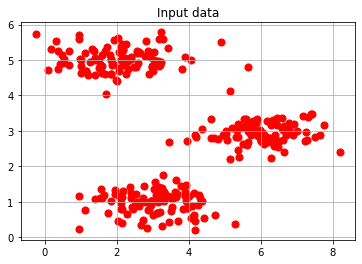

Finding clusters with K-mean algorithm


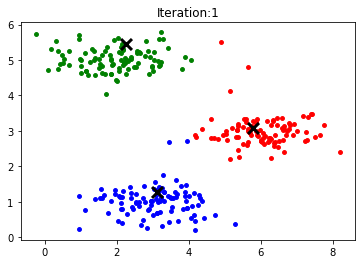

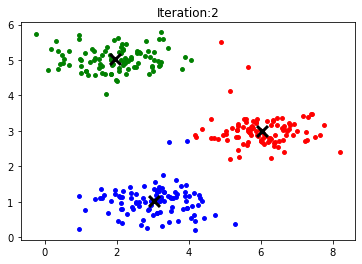

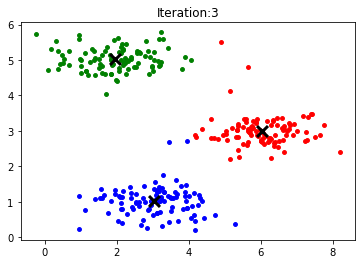

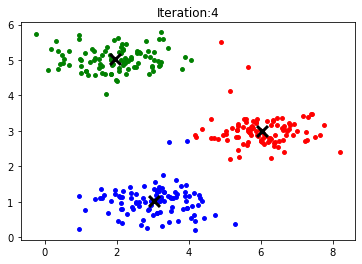

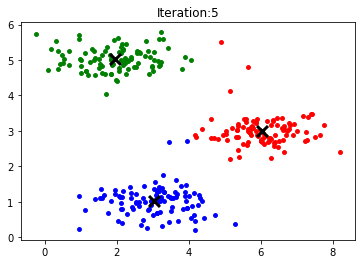

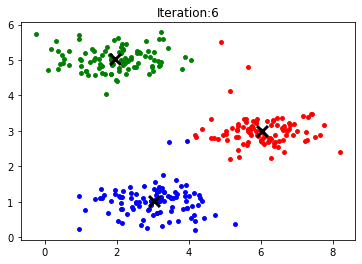

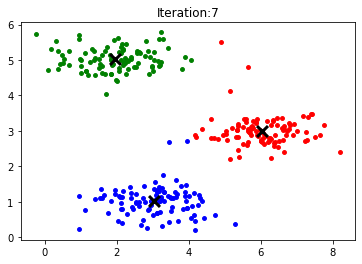

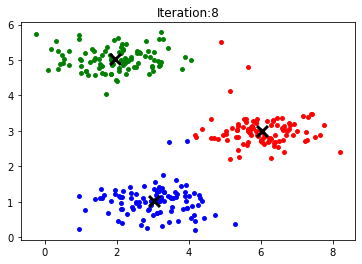

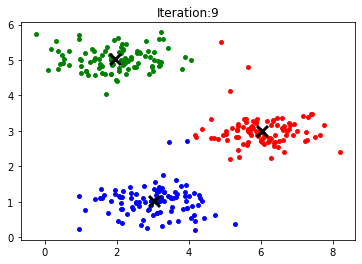

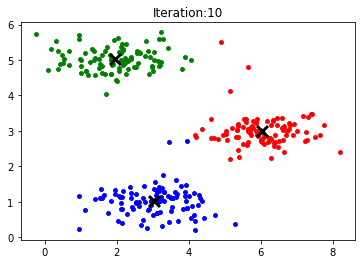

In [7]:
if __name__ == "__main__":

    
    #load dataset
    data_path = 'data5.csv'
    X = load_data(data_path)
    print("Shape of input data:",X.shape)
    
    #visualize the data
    plt.scatter(X[:, 0], X[:, 1], c='red', marker='o', s=50)
    plt.title("Input data")
    plt.grid()
    plt.show()
    
    #define number of centers
    K = 3
    
    #initialize K centers with random positions in the data set
    centroids = initCentroids(X, K)
    
    #assign each data point with the nearest center
    y = findClosestCentroids(X, centroids)
    
    #plot cluster with 10 iteration
    print("Finding clusters with K-mean algorithm")
    plotKmeans(X, centroids, y, K, 10)

    
    